## Import and Define global variables

In [1]:
import os
import cv2
import numpy as np

from utils.dataloader import DataLoader
from utils.transforms import Composer, HairRemoval, GaussianBlur
from utils.segmentation import KMeansSegmentation, ThresholdingSegmentation
from utils.vis import MatplotlibVisualizer

In [2]:
## Classes
CLASSES = ['nevus', 'others']

## Work folfer
work_folder = os.getcwd()
data_folder = os.path.join(work_folder, '..', 'Data/Challenge1')

## Visualizer
matplotlib_visualizer = MatplotlibVisualizer()

## Data Cleaning

### Move data with black background to another folder

In [4]:
mode = 'train'
os.makedirs(os.path.join(data_folder, mode, 'black_background'), exist_ok=True)

count = 0
dataloader = DataLoader(data_folder, mode, ignore_folders=['black_background', '.DS_Store'])
for i, (img, label, path) in enumerate(dataloader):
    
    im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    im_hist = cv2.calcHist([im_gray], [0], None, [256], [0, 256])
    
    if im_hist[0] > 0:
        count += 1
        os.makedirs(os.path.join(data_folder, mode, 'black_background', CLASSES[label]), exist_ok=True)
        os.rename(path, os.path.join(data_folder, mode, 'black_background', CLASSES[label], os.path.basename(path)))
        
print('There are {}/{:.2f}% images with black background in {}'.format(count, count/len(dataloader)*100, len(dataloader)))

There are 4436/29.19% images with black background in 15195


## Data Loader

In [6]:
len(dataloader)

3796

/Users/huytrq/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


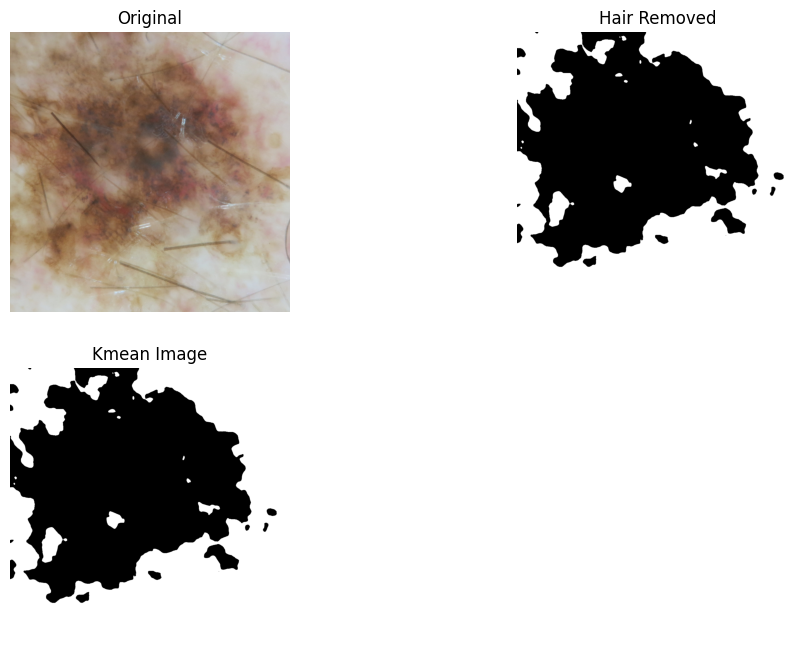

/Users/huytrq/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


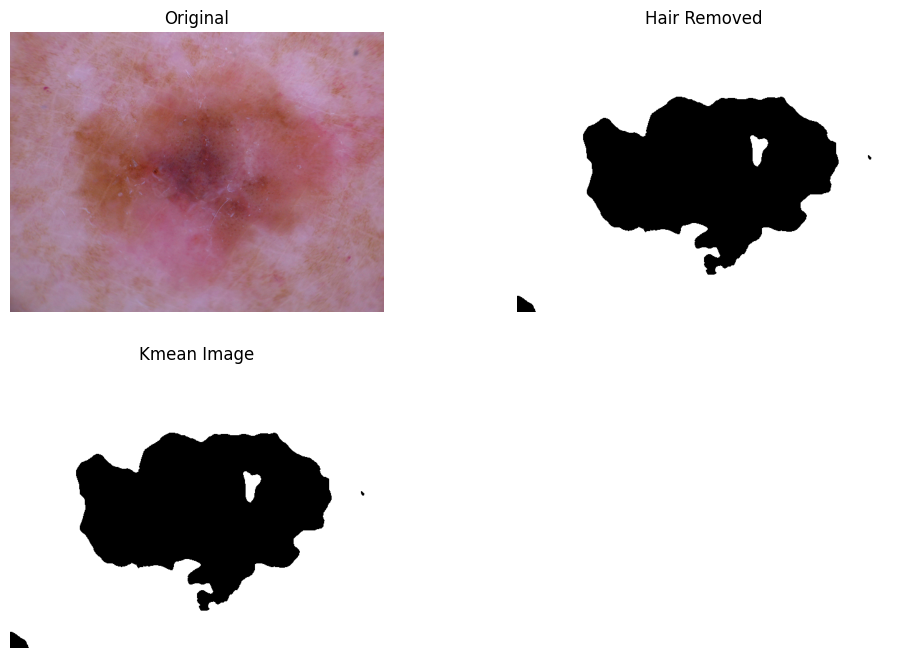

/Users/huytrq/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


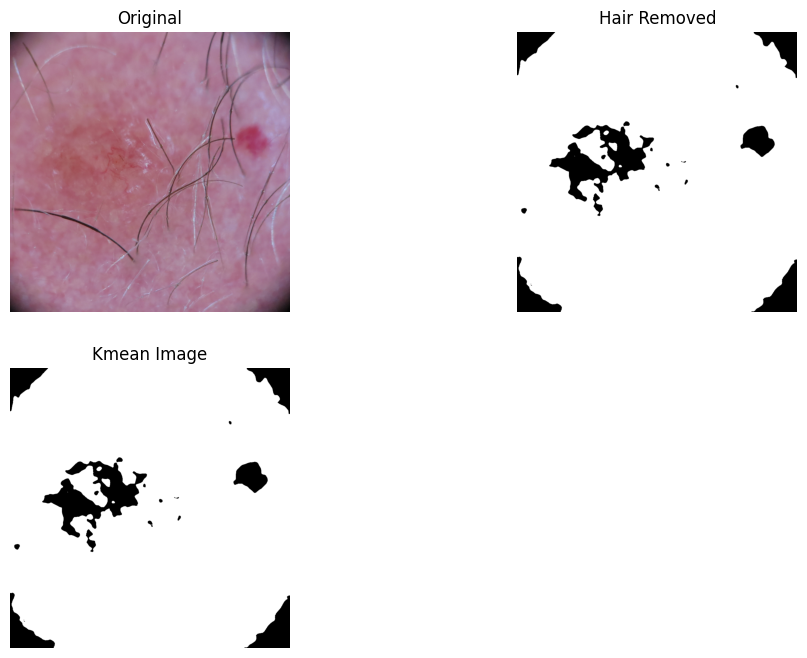

/Users/huytrq/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


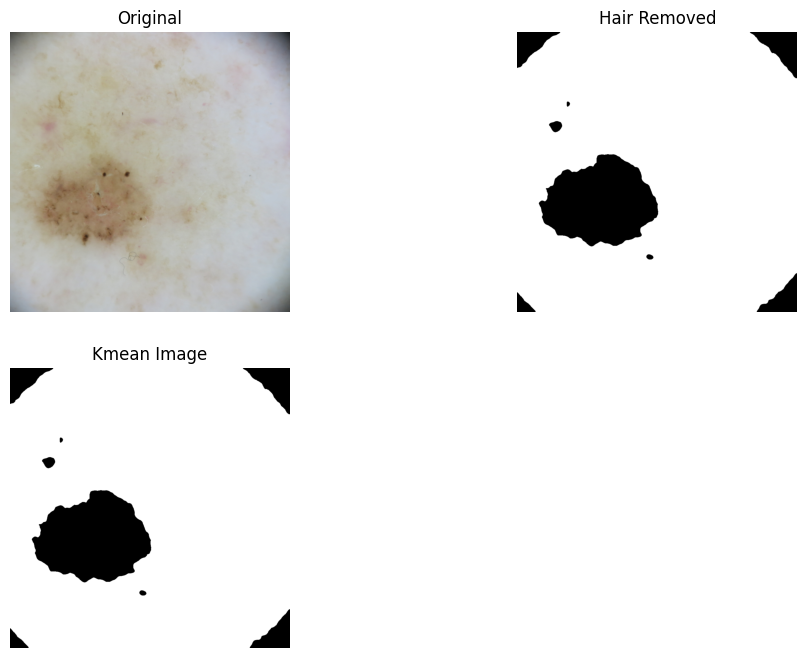

/Users/huytrq/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


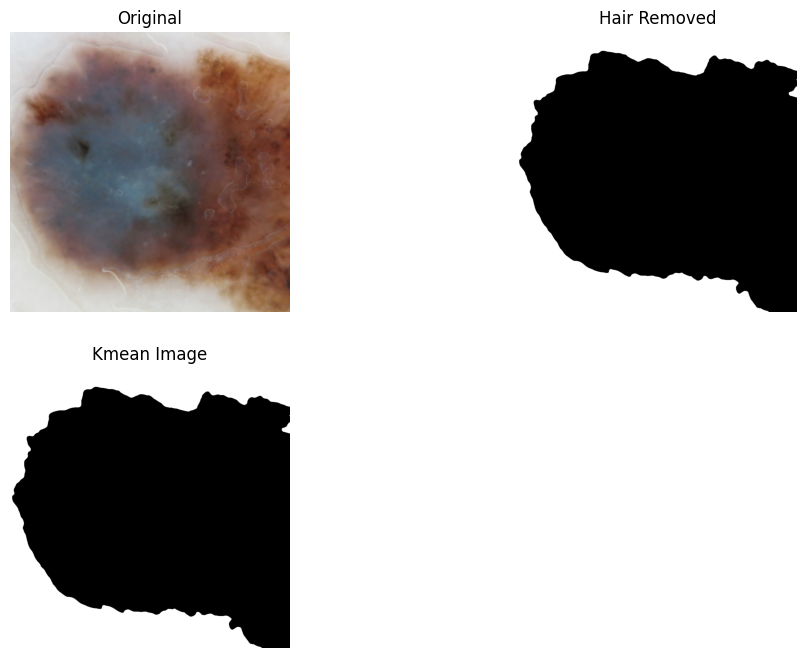

/Users/huytrq/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


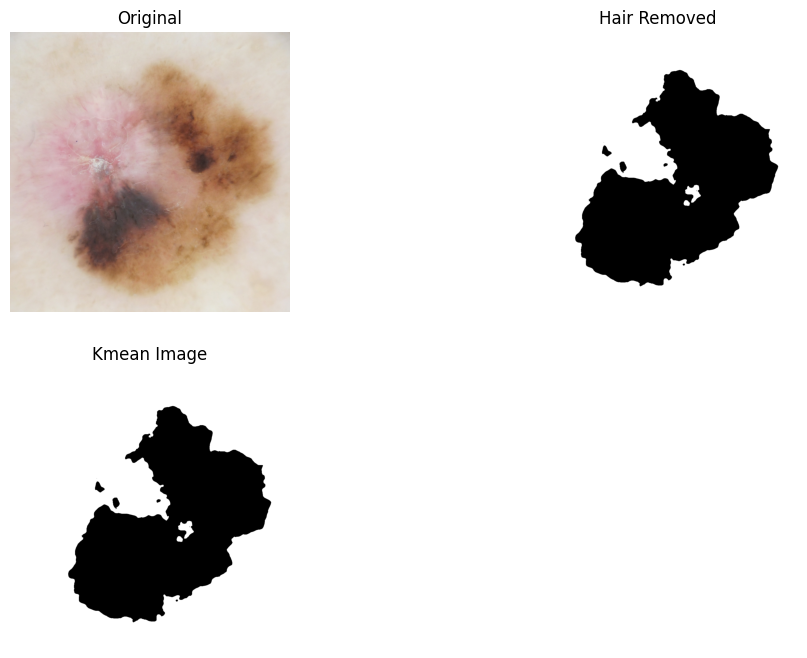

/Users/huytrq/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


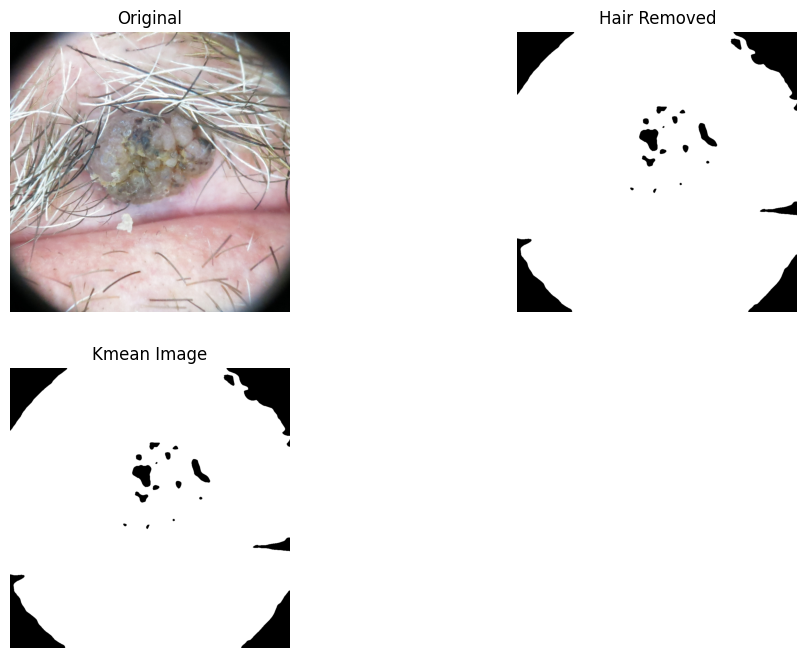

/Users/huytrq/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


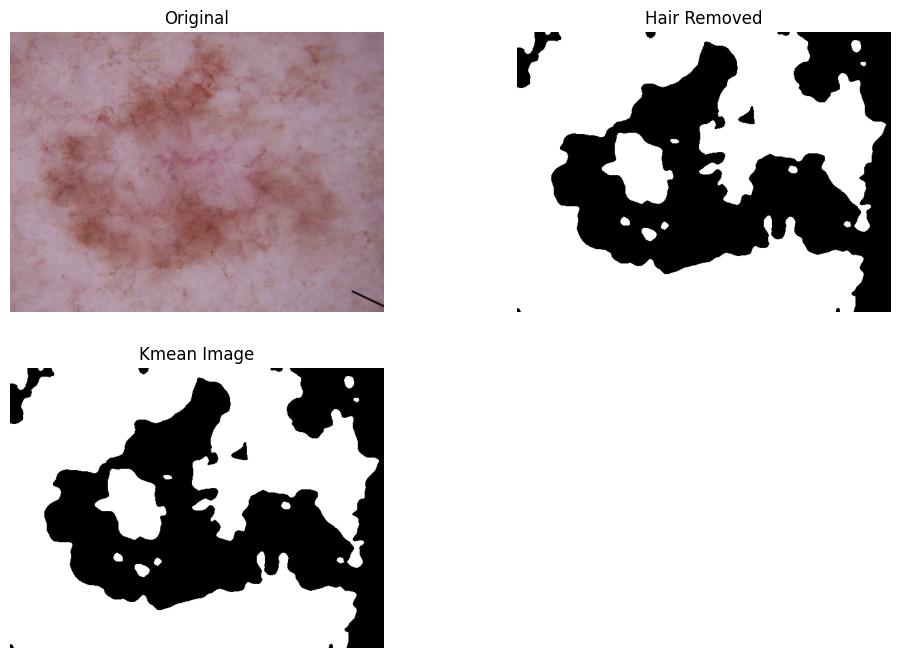

/Users/huytrq/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


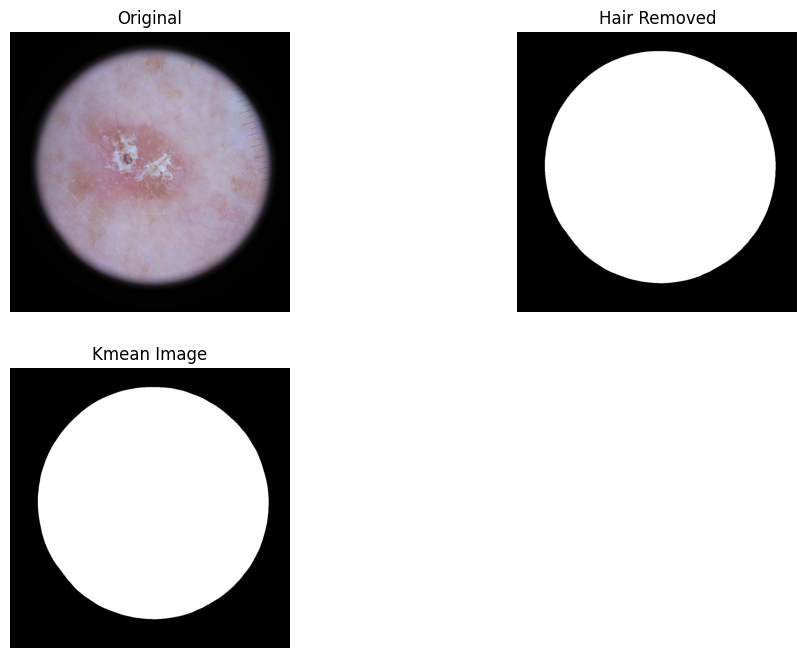

/Users/huytrq/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


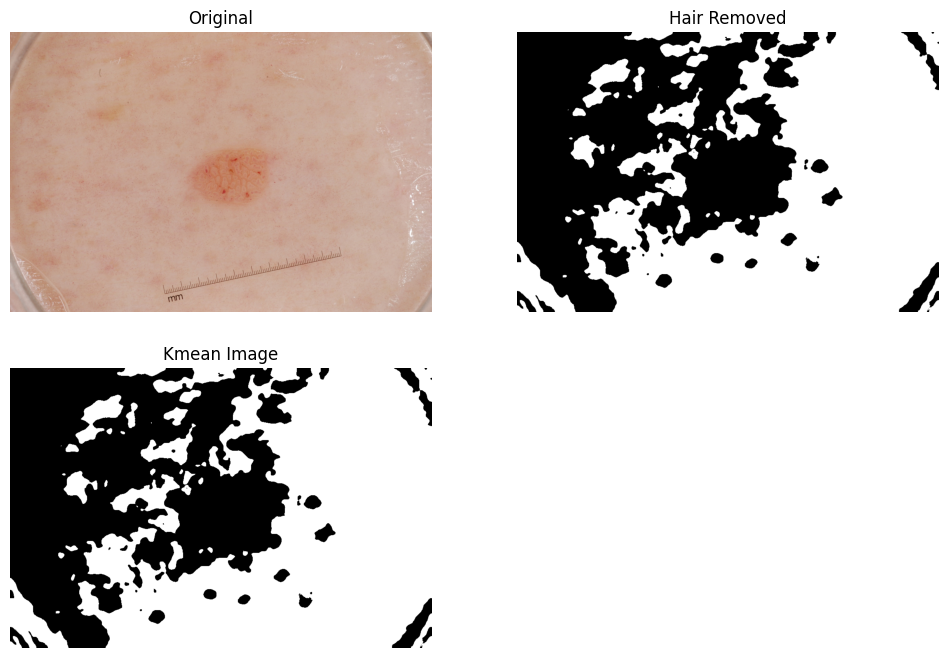

/Users/huytrq/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


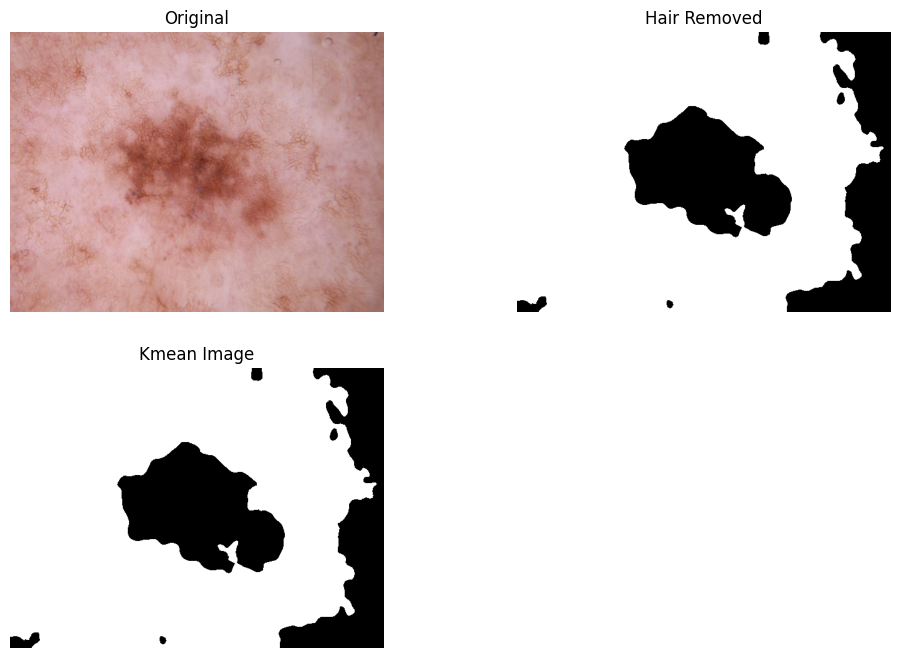

/Users/huytrq/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


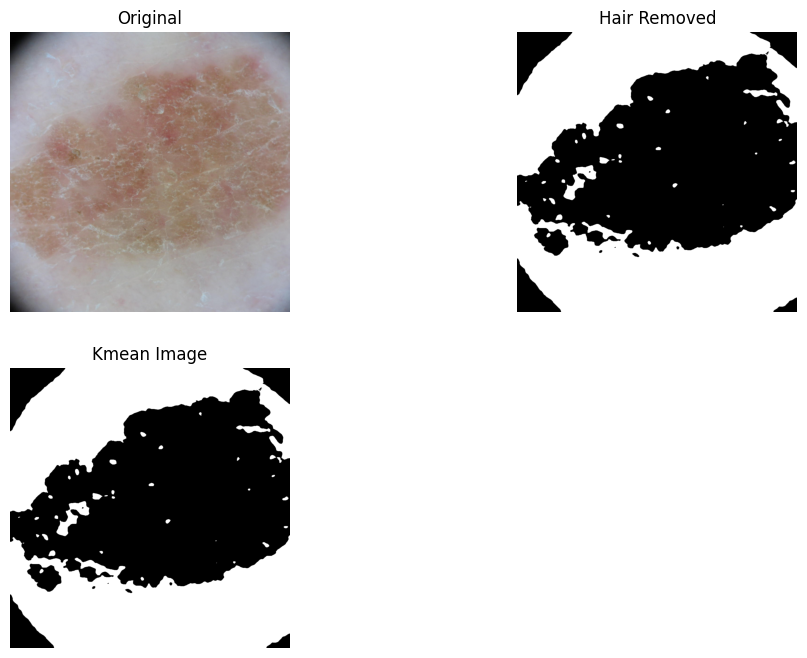

/Users/huytrq/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


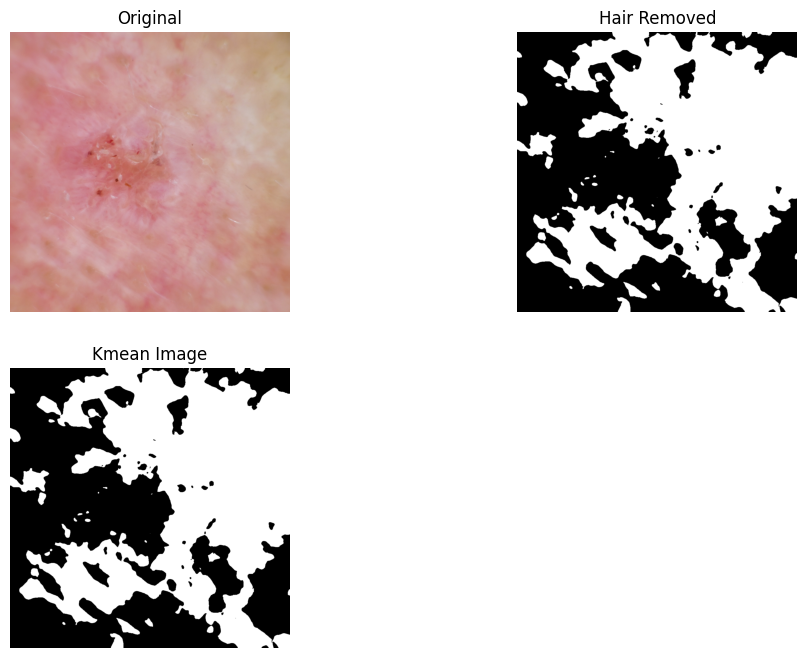

/Users/huytrq/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


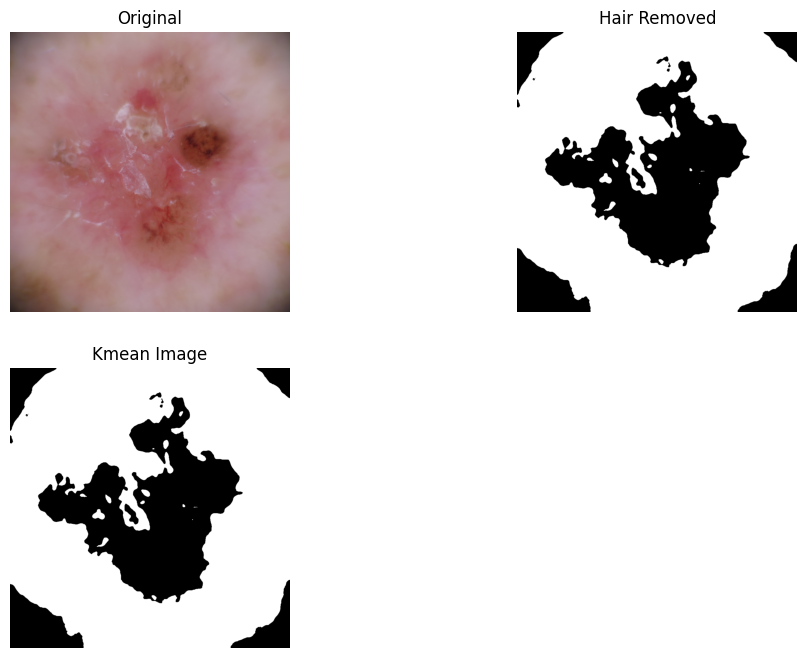

/Users/huytrq/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


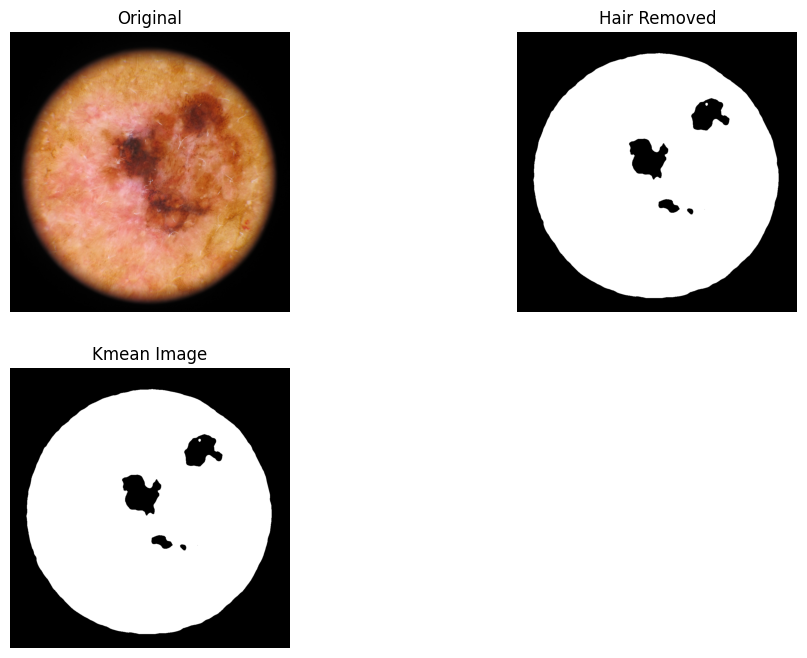

/Users/huytrq/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


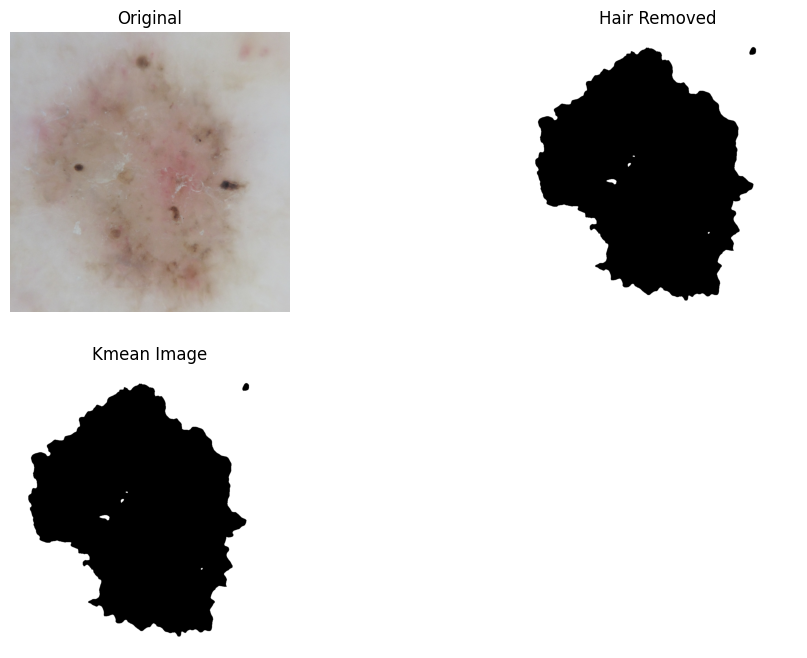

/Users/huytrq/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


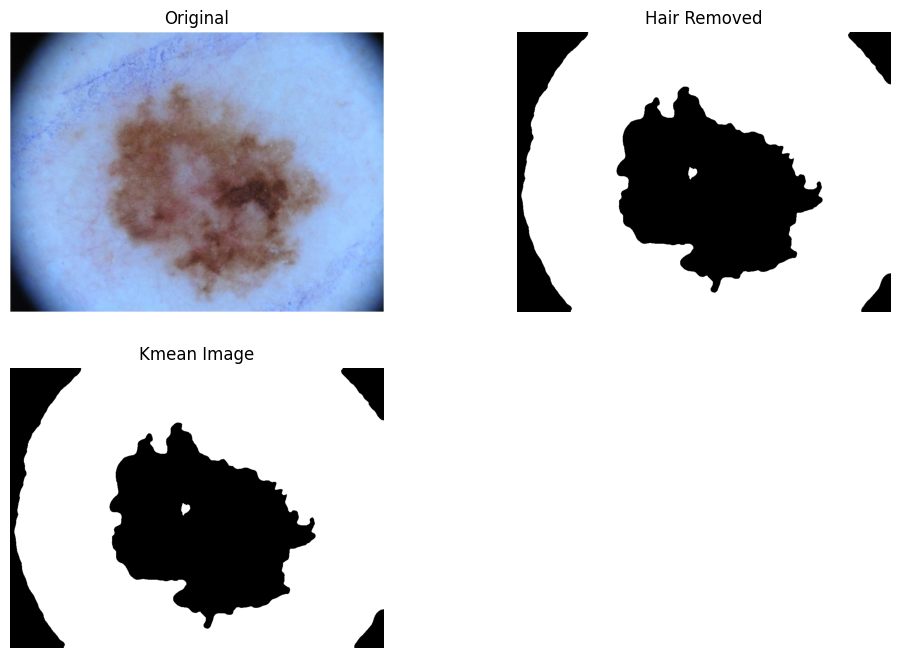

/Users/huytrq/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


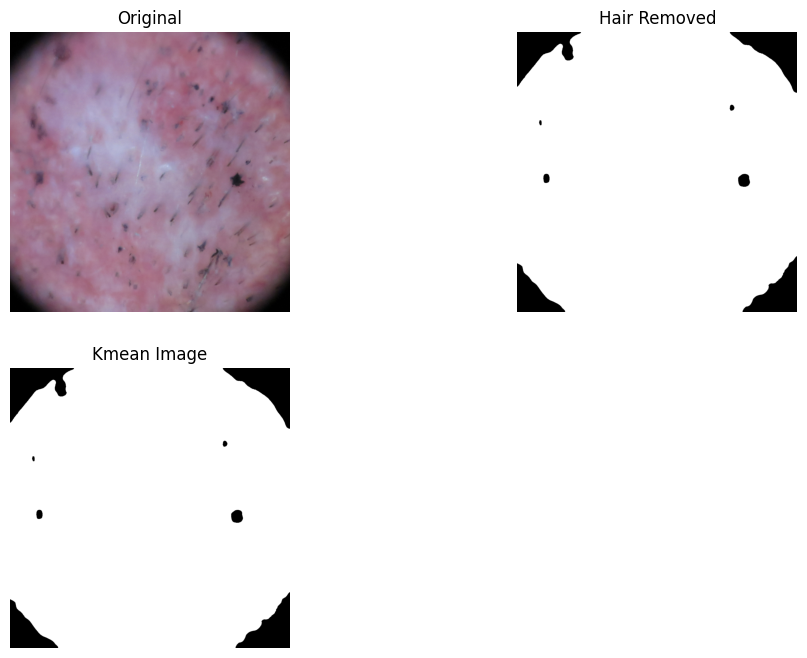

/Users/huytrq/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


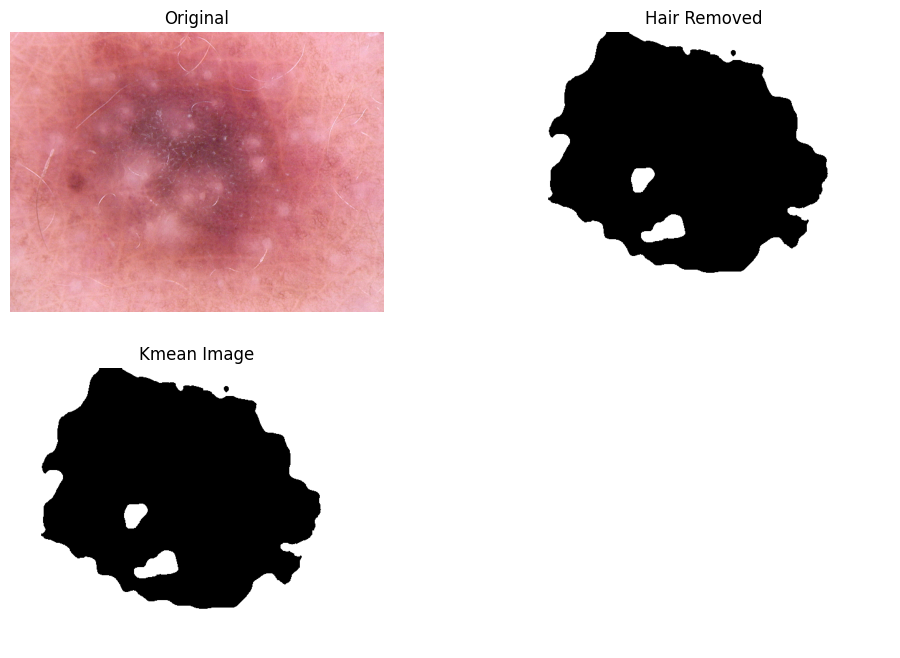

/Users/huytrq/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


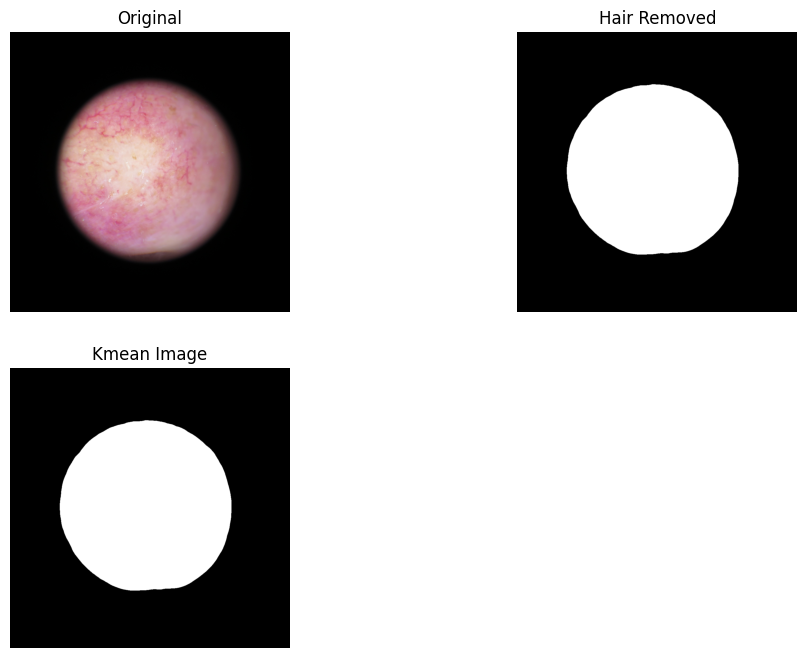

/Users/huytrq/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


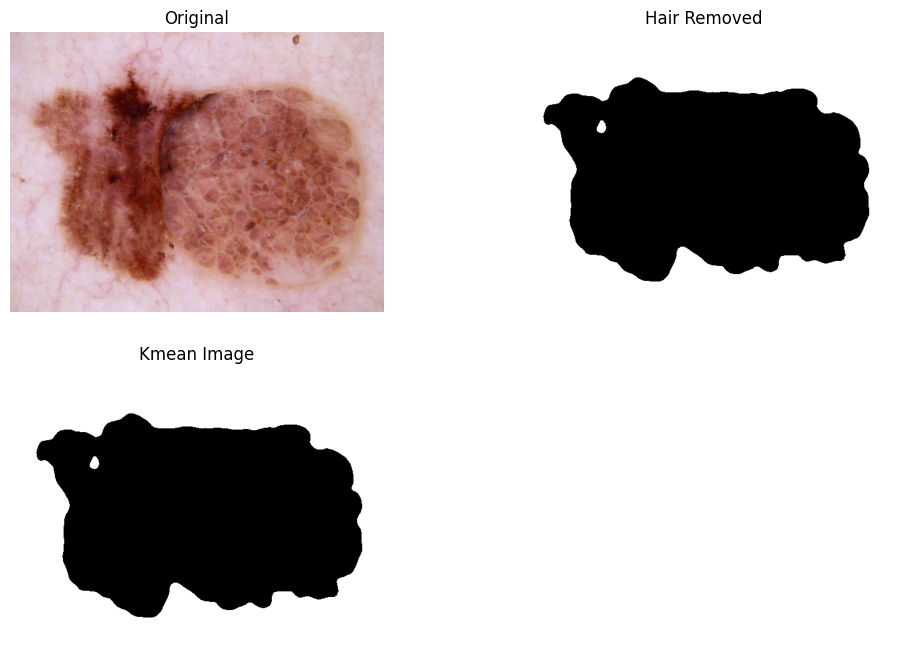

0


In [3]:
mode = 'train'

transforms_composer = Composer([
                                HairRemoval(),
                                GaussianBlur(kernel_size=(29, 29)),
                                ThresholdingSegmentation(method='otsu')
                                ])

type_count1 = 0
dataloader = DataLoader(data_folder, mode)
for i, (img, label, path) in enumerate(dataloader):
    
    im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    im_hist = cv2.calcHist([im_gray], [0], None, [256], [0, 256])
    
    transformed_img = transforms_composer(img=img)
    kmeans_img = KMeansSegmentation(k=3)(transformed_img)
    
    # Show the image and histogram in one line
    # matplotlib_visualizer.show_image_and_histogram(transformed_img, im_hist, 
    #                                             image_title='Image', 
    #                                             hist_title='Histogram', 
    #                                             x_label='Bins', 
    #                                             y_label='Number of Pixels')
    
    matplotlib_visualizer.show_multiple_images([img, transformed_img, kmeans_img], ['Original', 'Hair Removed', 'Kmean Image'])
    
    if i >= 20:
        break
print(type_count1)

## Object Centric Cropping

In [25]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15,15))  # You can adjust kernel size based on hair thickness
# Apply a blackhat filter to highlight the hair
blackhat = cv2.morphologyEx(im_gray, cv2.MORPH_BLACKHAT, kernel)

# Apply a binary threshold to extract the hair regions
_, threshold = cv2.threshold(blackhat, 10, 255, cv2.THRESH_BINARY)

# Perform morphological closing to clean up the mask
kernel_close = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))  # Adjust size if necessary
closing = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel_close)

# Inpaint the original image using the hair mask to remove the hair
result = cv2.inpaint(img, closing, inpaintRadius=1, flags=cv2.INPAINT_TELEA)


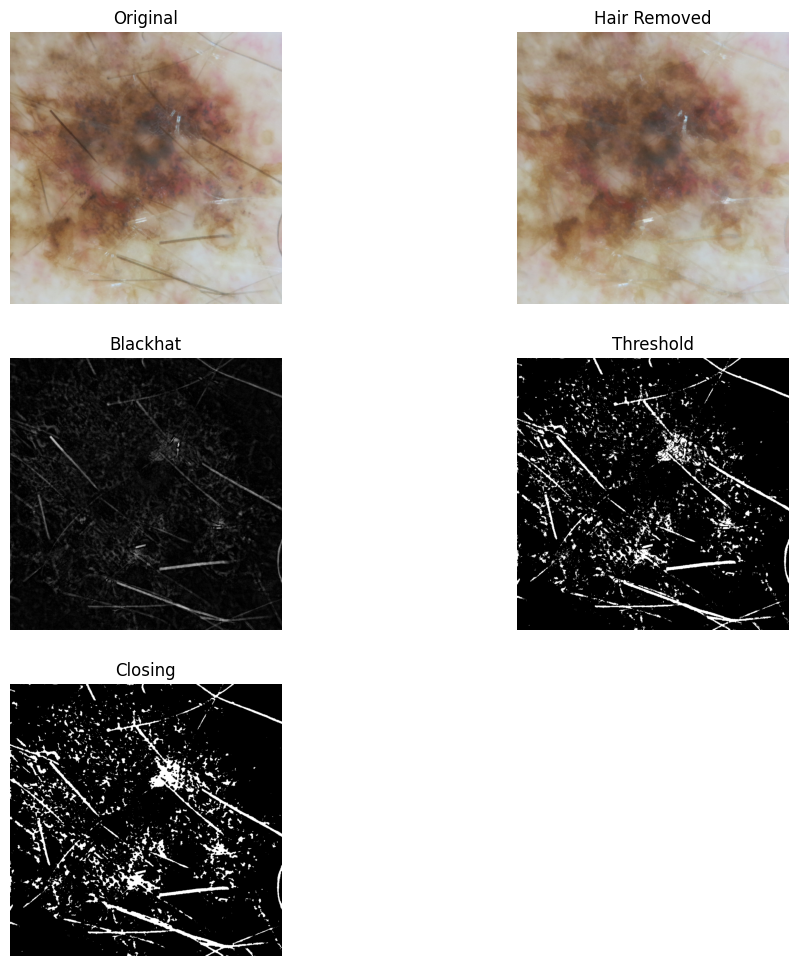

In [26]:
matplotlib_visualizer.show_multiple_images([img, result, blackhat, threshold, closing], ['Original', 'Hair Removed', 'Blackhat', 'Threshold', 'Closing'])